In [1]:
import pandas as pd
import math
import random
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from GA.CNN import CNN
from function_modules.adaptive_landscape_module import *

In [2]:
cnn = CNN('../../Models/CNN_6_1_2.keras')
num_sequences = 100

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


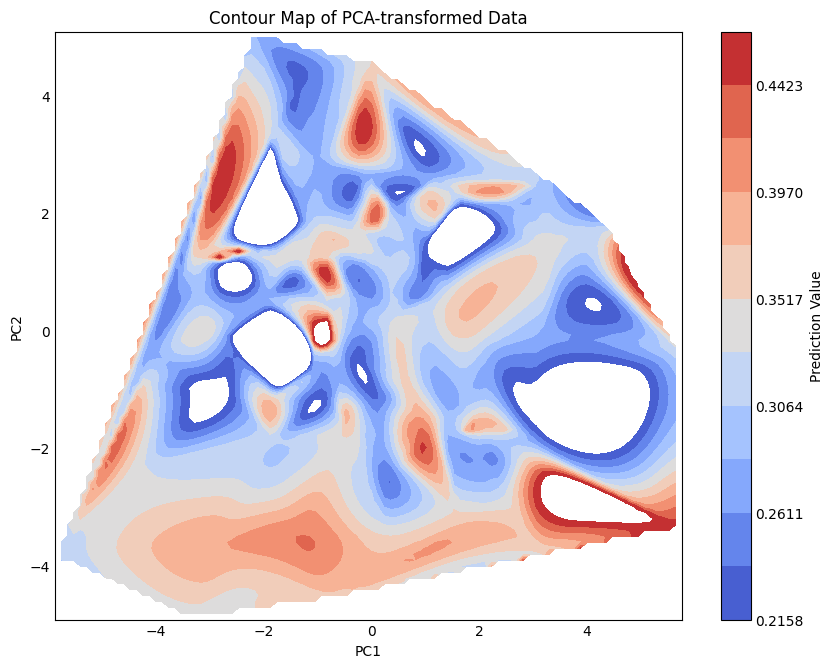

In [3]:
# pLac -35, spacer, -10
masked_sequence = cnn.one_hot_sequence('AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG')
mask_indices = [i for i, element in enumerate(masked_sequence) if all(math.isclose(e, 0.25, rel_tol=1e-9) for e in element)]

df = pd.DataFrame()
df['sequence'] = generate_population(n=num_sequences, masked_sequence=masked_sequence, mask_indices=mask_indices)
df['prediction'] = cnn.predict(df['sequence'])

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=num_sequences, y_points=num_sequences)

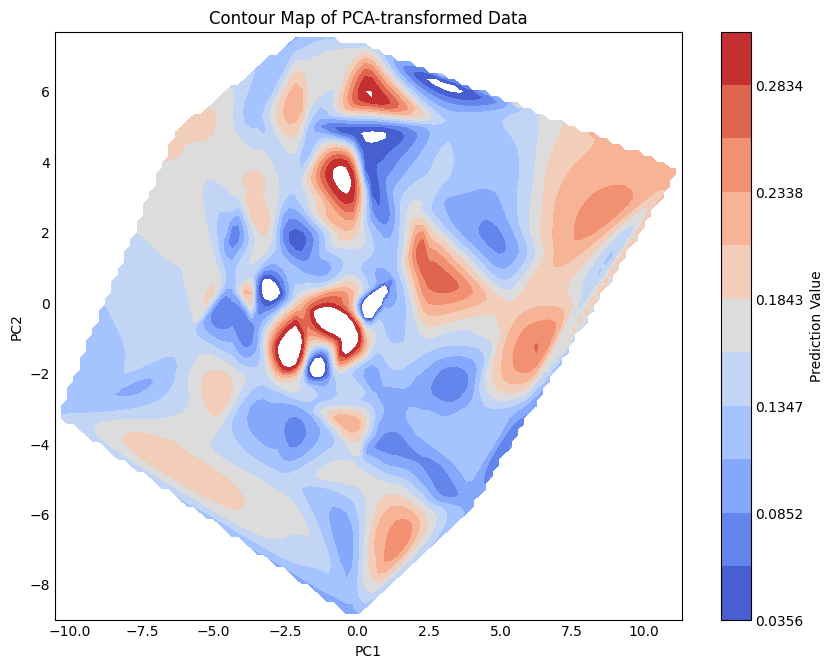

In [4]:
# Blank promoter sequence
masked_sequence = cnn.one_hot_sequence('N' * 150)
mask_indices = [i for i, element in enumerate(masked_sequence) if all(math.isclose(e, 0.25, rel_tol=1e-9) for e in element)]

df = pd.DataFrame()
df['sequence'] = generate_population(n=num_sequences, masked_sequence=masked_sequence, mask_indices=mask_indices)
df['prediction'] = cnn.predict(df['sequence'])

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=num_sequences, y_points=num_sequences)

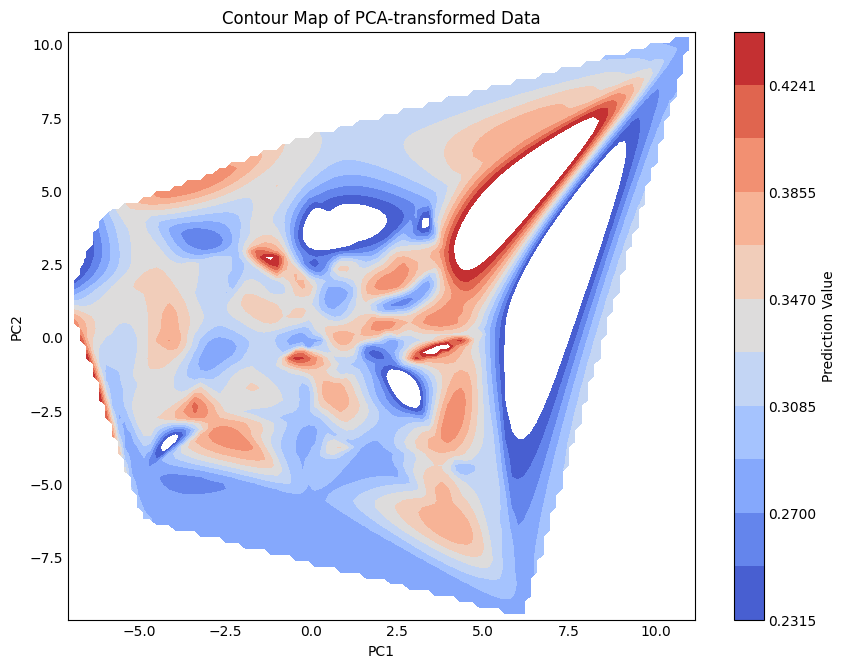

In [5]:
# Change random elements in the pLac promoter
pLac = 'AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGGCGGGAAGACAACTAGGGG'
encoded_pLac = cnn.one_hot_sequence(pLac)

masked_sequences = []
for i in range(num_sequences):
    masked_sequence = list(encoded_pLac)
    mask_indices = random.sample(range(len(masked_sequence)), 12)
    for index in mask_indices:
        masked_sequence[index] = generate_nucleotide()
    masked_sequences.append(masked_sequence)

df = pd.DataFrame()
df['sequence'] = masked_sequences
df['prediction'] = cnn.predict(df['sequence'])

pca_df = append_pca(df)
plot_PCA_contour(pca_df, x_points=num_sequences, y_points=num_sequences)